

<img src="https://raw.githubusercontent.com/leonardodallosmartinez/IA-Proyecto_prediction_breath_cancer/master/Banner/Banner%20-%20bread_cancer.png" alt="Drawing" style="width:1700px;">






- Ademas del cancer de piel, es el que mas afecta a las mujeres.
- La tasa de supervivencia promedio a 5 años de las mujeres con cáncer de mama invasivo es del 90 %. La tasa de supervivencia promedio a 10 años es del 83 %.
- Si el cáncer se encuentra solo en la mama, la tasa de supervivencia a 5 años de mujeres con cáncer de mama es del 99 %, 62 % de las personas con cáncer de mama se les diagnostica esta etapa. 
- Es muy importante la deteccion temprana de el cancer, pues  si este se ha diseminado hacia los ganglios linfáticos regionales, la tasa de supervivencia a 5 años es del 85 %. Si el cáncer se ha diseminado a una parte distante del cuerpo, la tasa de supervivencia a 5 años es del 27 %.
- Alrededor del 6 % de las mujeres tienen cáncer metastásico cuando se les diagnostica cáncer de mama por primera vez. 

Las caracteristicas seran tomadas de una muestras del tejido de seno extraidas mediante la tecnica FNA, para cada muestra se tomaron diferentes medidas, las cuales se recolectaron en parametros de media, error estandar, y la peor dato medido (promedio de las medidas de valores mas grandes); teniendo asi 3 caracteristicas para cada aspecto medido.

Los aspectos recolectados en cada muestra extraida son:

    1) ID number
    2) Diagnosis (M = malignant, B = benign)
    a) radius (mean of distances from center to points on the perimeter)
    b) texture (standard deviation of gray-scale values)
    c) perimeter
    d) area
    e) smoothness (local variation in radius lengths)
    f) compactness (perimeter^2 / area - 1.0)
    g). concavity (severity of concave portions of the contour)
    h). concave points (number of concave portions of the contour)
    i). symmetry
    j). fractal dimension ("coastline approximation" - 1)

El dataset se obtuvo de la siguiente fuente:

- https://www.kaggle.com/uciml/breast-cancer-wisconsin-data


**Objetivos:**
- Realizar un modelo de predicción para identificacion de cáncer de mama a partir de los datos tomados de muestras de tejidos sospechosos realizados con FNA.

- Identificar los factores mas influyentes en la indentificacion del cancer mediante el modelo predicitvo seleccionado.

In [ ]:
#@title 1. **MONTAR EL DRIVE** { display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/course-IA1/ai-uis-student')
print(os.getcwd())

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/course-IA1/ai-uis-student


In [ ]:
#@title 2. LOAD LIB { display-mode: "form" }
from __future__ import division, print_function, unicode_literals #py2 and py3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import KFold
from sklearn.metrics import *
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#####**CARGA Y EXPLORACIÓN DE LOS DATOS**


In [ ]:
datos = pd.read_csv("data/cancer_seno.csv", sep=",")
#datos1=datos.sample(frac=1).reset_index(drop=True)
#vals = np.random.permutation(datos.values)
print(datos.shape)
datos
#datos.tail(10)

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
datos.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4e5afddcf8>,
      dtype=object)

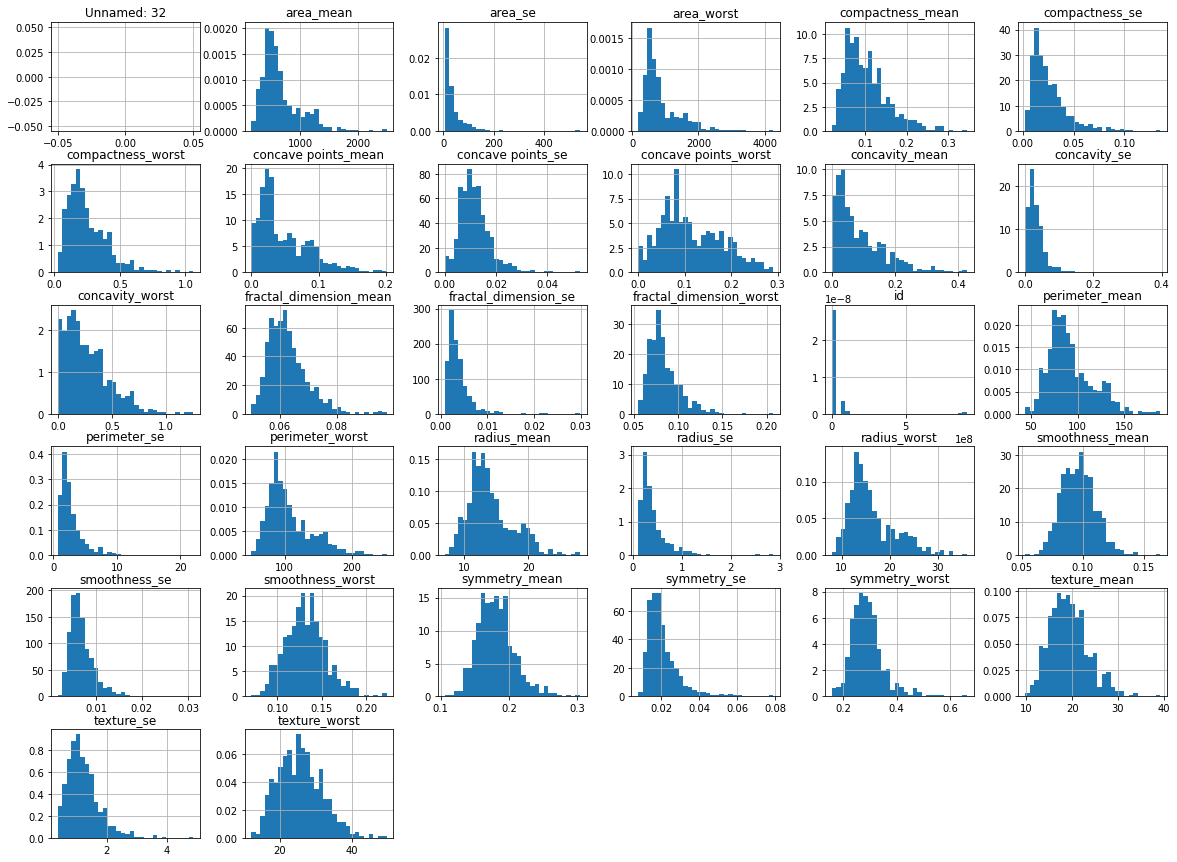

In [ ]:
datos.hist(bins=30, density=True, figsize=(20,15))

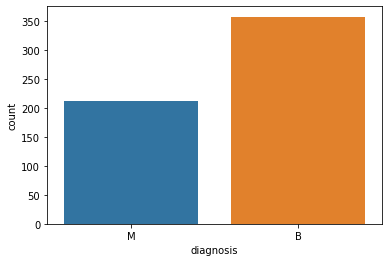

In [ ]:
sns.countplot(datos['diagnosis'],label="Count")

#####**PREPROCESAMIENTO DE DATOS**

In [ ]:
#Verificando si hay valores nulos
print(pd.isnull(datos).sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
#Borrando la columna con valores nulos (Unnamed) y la columna id.
datos.drop("Unnamed: 32",axis=1,inplace=True)
datos.drop("id",axis=1,inplace=True)

Definimos un valor numerico para las clases:

-Malignant: **1**

-Benign: **0**

In [ ]:
#Asignando valores numericos a las clases
datos['diagnosis']=datos['diagnosis'].map({'M':1,'B':0})
datos

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
#Los datos se dividen en 3 grupos de datos de acuerdo a: media, error estandar, peor dato(worst).
datos_mean= list(datos.columns[1:11])
datos_se= list(datos.columns[11:20])
datos_worst=list(datos.columns[21:31])
print('Datos_mean: \n' ,datos_mean)
print("-----------------------------------")
print('Datos_DE: \n', datos_se)
print("------------------------------------")
print('Datos_worst: \n', datos_worst)

Datos_mean: 
 ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
-----------------------------------
Datos_DE: 
 ['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se']
------------------------------------
Datos_worst: 
 ['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


#####ANALISIS DE DATOS Y SELECCION DE CARACTERISTICAS PRINCIPALES

######Analisis de datos: datos_mean

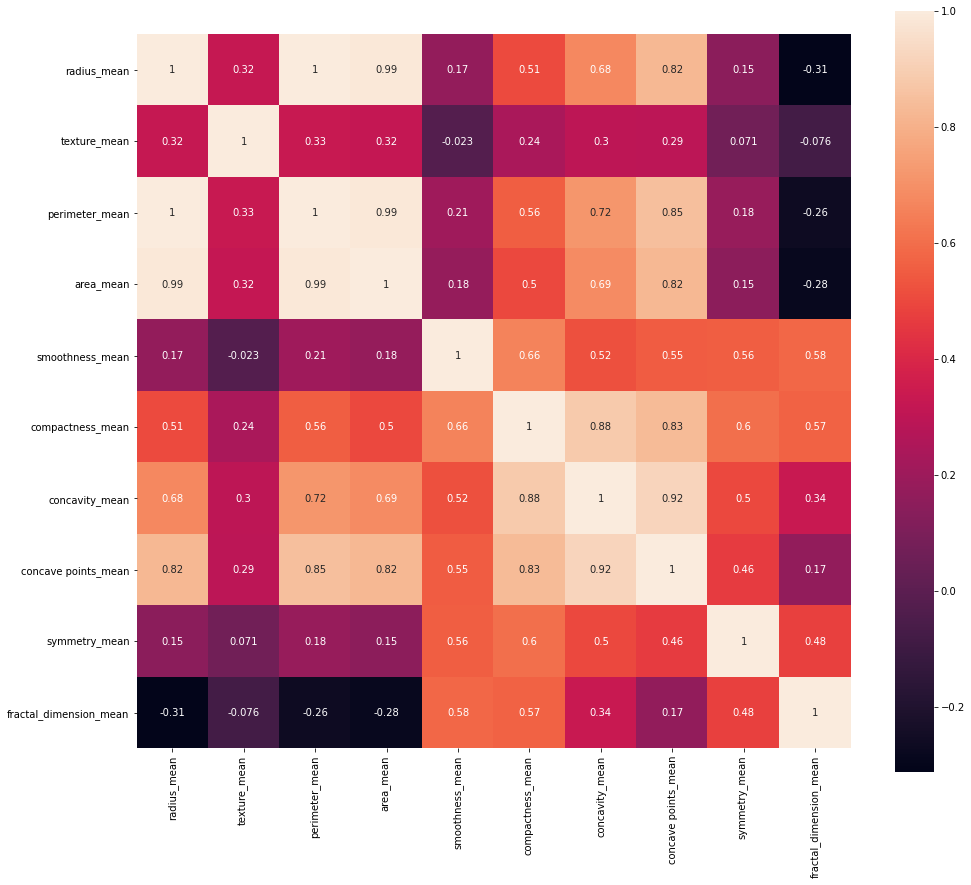

In [ ]:
#Correlación
import seaborn as sns

#datos.corr()
plt.figure(figsize = (16,14))
sns.heatmap(datos[datos_mean].corr(), square=True, annot=True)

- Se observa que los parametros radio, perimetro y area estan altamente correlacionados.
- Otro grupo de parametros que se encuentran correlacionados son compactness_mean, concavity_mean y concavepoint_mean.

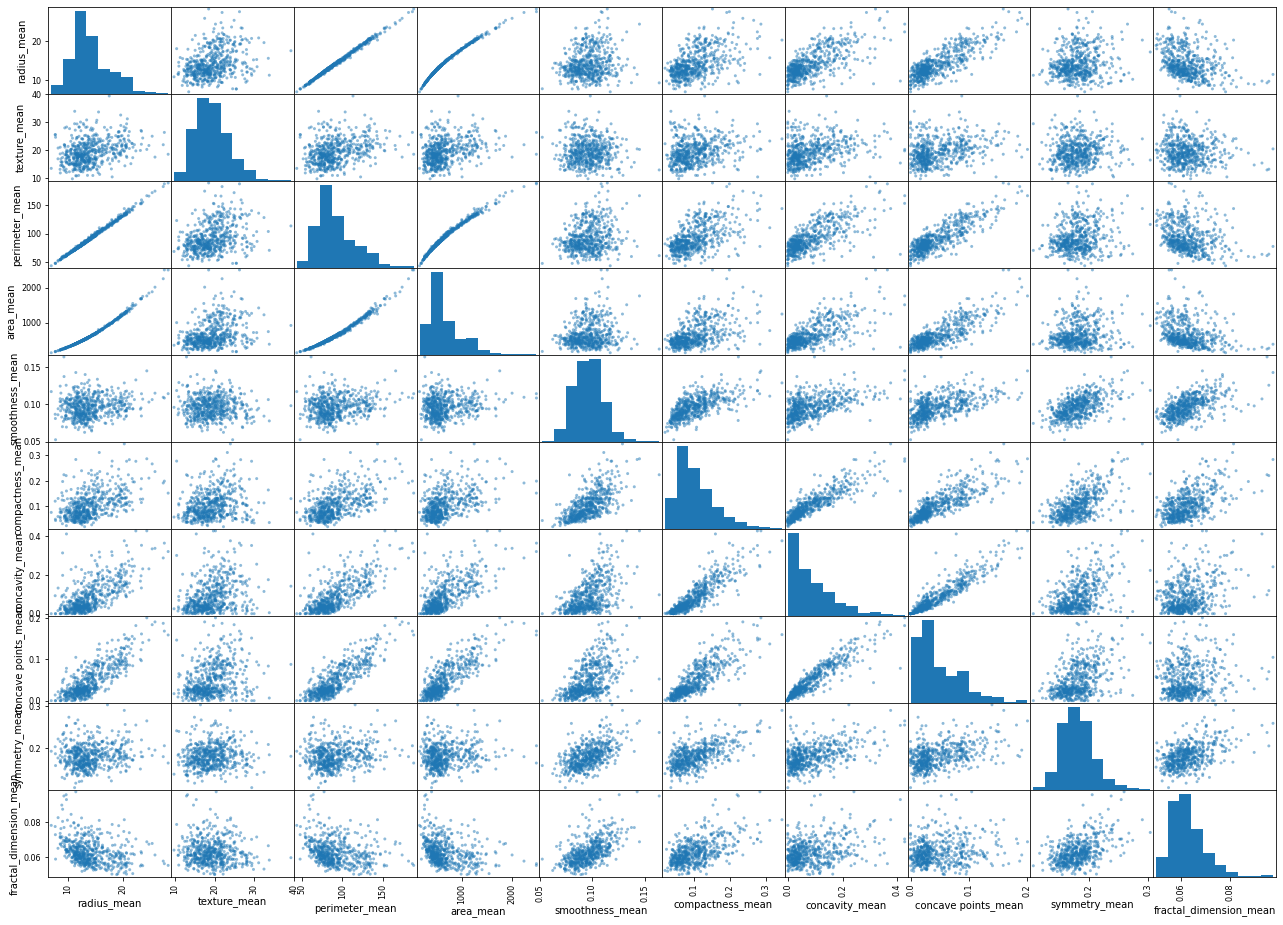

In [ ]:
pd.plotting.scatter_matrix(datos[datos_mean], figsize=(22,16));

- Parametros radio, area y perimetro tiene  una fuerte relacion lineal, util para clasificar entre 2 clases.
- Parametros texture_mean, smoothnes_mean, symmetry_mean y fractal_dimension no tiene una correlacion marcada por lo que no pueden usarse para clasificar 2 categorias. 

######Analisis de datos: datos_worst

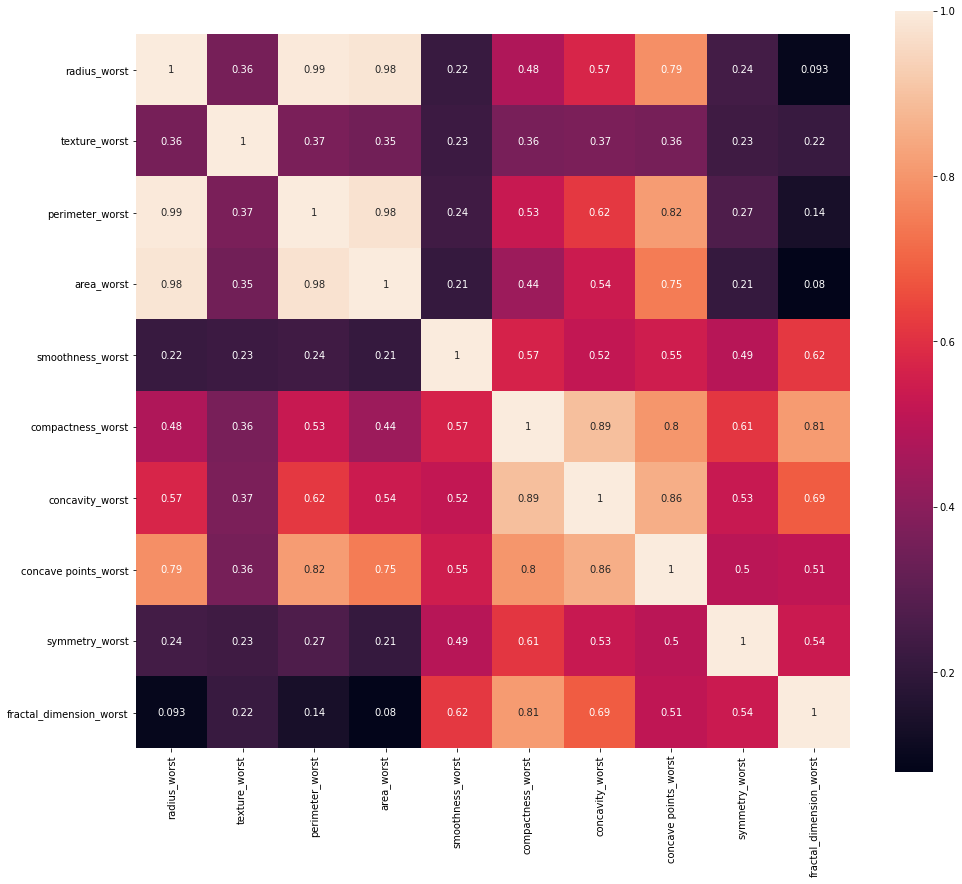

In [ ]:
#Correlación
import seaborn as sns

#datos.corr()
plt.figure(figsize = (16,14))
sns.heatmap(datos[datos_worst].corr(), square=True, annot=True)

Igual que con los datos_mean:

- Se observa que los parametros radio, perimetro y area estan altamente correlacionados.
- Otro grupo de parametros que se encuentran correlacionados son compactness_mean, concavity_mean y concavepoint_mean.

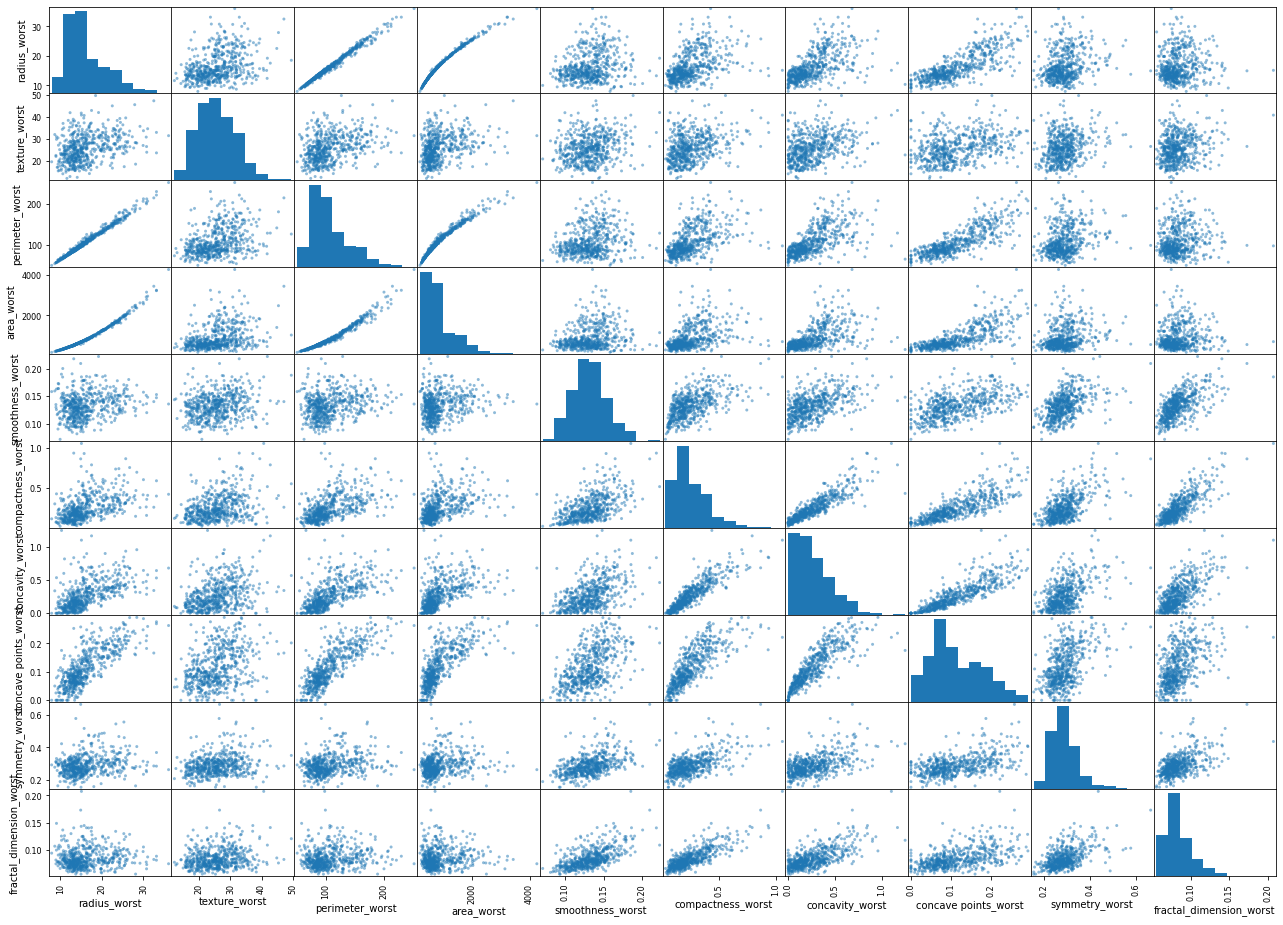

In [ ]:
pd.plotting.scatter_matrix(datos[datos_worst], figsize=(22,16));

Igual que con los datos_mean se observa:

- Parametros radio, area y perimetro tiene  una fuerte relacion lineal.
- Parametros texture_mean, smoothnes_mean, symmetry_mean y fractal_dimension no tiene una correlacion marcada por lo que no pueden usarse para clasificar 2 categorias. 

######Seleccion de parametros

- Puesto que las caraceristicas que mejor representan los datos son las de la media: datos_mean, estos seran las tomados para el estudio.
- Se removeran las caracteristicas que no son recomendables para usarse para clasificar entre dos clases.

In [ ]:
datos_mean

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean']

In [ ]:
X = datos.loc[:,['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean']].values[:,:]
y = datos.loc[:,['diagnosis']].values[:,0]

print(type(y), type(datos))
X

<class 'numpy.ndarray'> <class 'pandas.core.frame.DataFrame'>


array([[1.799e+01, 1.228e+02, 1.001e+03, 2.776e-01, 1.471e-01],
       [2.057e+01, 1.329e+02, 1.326e+03, 7.864e-02, 7.017e-02],
       [1.969e+01, 1.300e+02, 1.203e+03, 1.599e-01, 1.279e-01],
       ...,
       [1.660e+01, 1.083e+02, 8.581e+02, 1.023e-01, 5.302e-02],
       [2.060e+01, 1.401e+02, 1.265e+03, 2.770e-01, 1.520e-01],
       [7.760e+00, 4.792e+01, 1.810e+02, 4.362e-02, 0.000e+00]])

#####DEFINIENDO MODELOS MATEMATICOS A PROBAR

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

est_GNB = GaussianNB()
est_LR= LogisticRegression()
est_DT = DecisionTreeClassifier()
est_RF = RandomForestClassifier()
est_SVC = SVC(kernel='linear')


######Testeo de diferentes modelos

In [ ]:
# Partiendo los datos directamente con un n.
n = int(len(X)*0.7)

est_GNB.fit(X[:n], y[:n])
#est_LR.fit(X[:n], y[:n])
est_DT.fit(X[:n], y[:n])
est_RF.fit(X[:n], y[:n])
est_SVC.fit(X[:n], y[:n])

print("score_GNB:  %.3f"%accuracy_score(est_GNB.predict(X[n:]), y[n:]))
#print("score_LR:   %.3f"%accuracy_score(est_LR.predict(X[n:]), y[n:]))
print("score_DT:   %.3f"%accuracy_score(est_DT.predict(X[n:]), y[n:]))
print("score_RF:   %.3f"%accuracy_score(est_RF.predict(X[n:]), y[n:]))
print("score_SVC:  %.3f"%accuracy_score(est_SVC.predict(X[n:]), y[n:]))

score_GNB:  0.930
score_DT:   0.901
score_RF:   0.930
score_SVC:  0.936


In [ ]:
# Partiendo los datos directamente con un n mediante train_test_split
from sklearn.model_selection import train_test_split

test_size=0.3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size) #test_size=0.25 por defecto.

est_GNB.fit(X_train, y_train)
est_DT.fit(X_train, y_train)
est_RF.fit(X_train, y_train)
est_SVC.fit(X_train, y_train)

score_GNB=est_GNB.score(X_test, y_test)
score_DT=est_DT.score(X_test, y_test)
score_RF=est_RF.score(X_test, y_test)
score_SVC=est_SVC.score(X_test, y_test)

print("score_GNB:  %.3f"%score_GNB)
print("score_DT:   %.3f"%score_DT)
print("score_RF:   %.3f"%score_RF)
print("score_SVC:  %.3f"%score_SVC)


score_GNB:  0.889
score_DT:   0.901
score_RF:   0.912
score_SVC:  0.877


Seleccionando numero de kfolds para cross val score

In [ ]:
def show_curve(est):
    means, stds = [], []
    nfolds_range = range(2,10)
    for nfolds in nfolds_range:
        #print (nfolds,)
        s = cross_val_score(est, X, y, cv=KFold(nfolds, shuffle=True), scoring=make_scorer(mean_squared_error))
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()

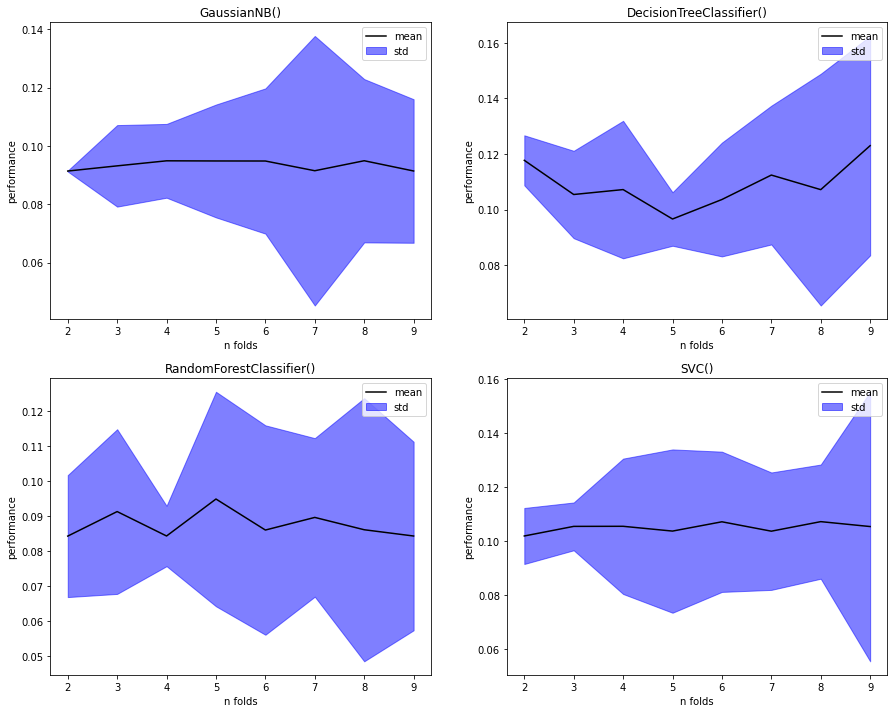

In [ ]:
estimadores=[est_GNB, est_DT, est_RF, est_SVC]
C=["GaussianNB()","DecisionTreeClassifier()","RandomForestClassifier()", "SVC()"]
plt.figure(figsize=(15,12))
for i,est in enumerate(estimadores):
    plt.subplot(2,2,i+1)
    plt.title(C[i])
    show_curve(est)

**Numero de k-folds para el cross val-score: 5**

In [ ]:
n_kfolds=6

In [ ]:
#Usando cross validation
s = cross_val_score(est_GNB, X, y, cv=KFold(n_kfolds, shuffle=True), scoring=make_scorer(accuracy_score))
#print (s)
score_crossval_GNB=np.mean(s)
print ("score_crossval_GNB:   %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est_DT, X, y, cv=KFold(n_kfolds, shuffle=True), scoring=make_scorer(accuracy_score))
#print (s)
score_crossval_DT=np.mean(s)
print ("score_crossval_DT:    %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est_RF, X, y, cv=KFold(n_kfolds, shuffle=True), scoring=make_scorer(accuracy_score))
#print (s)
score_crossval_RF=np.mean(s)
print ("score_crossval_RF:    %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est_SVC, X, y, cv=KFold(n_kfolds, shuffle=True), scoring=make_scorer(accuracy_score))
#print (s)
score_crossval_SVC=np.mean(s)
print ("score_crossval_SVC:   %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

score_crossval_GNB:   0.905 (+/- 0.03585)
score_crossval_DT:    0.896 (+/- 0.01755)
score_crossval_RF:    0.914 (+/- 0.01156)
score_crossval_SVC:   0.898 (+/- 0.02323)


Usando PCA 


Seleccionando número de componentes para PCA
- Para seleccionar el numero de componentes para el PCA volvemos a considerar el dataset completo, tanto datos_mean, datos_de y datos_worst.

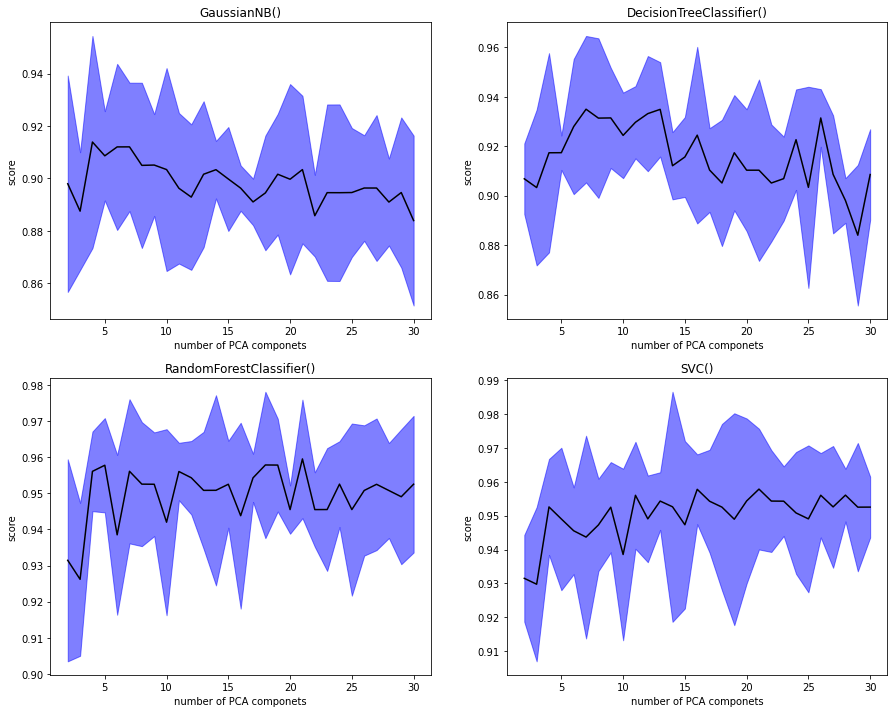

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
#test_size=0.3
X = datos.values[:,1:]
y = datos.values[:,0]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

estimadores=[est_GNB, est_DT, est_RF, est_SVC]
C=["GaussianNB()","DecisionTreeClassifier()","RandomForestClassifier()", "SVC()"]
plt.figure(figsize=(15,12))
for i,est in enumerate(estimadores):
    plt.subplot(2,2,i+1)
    plt.title(C[i])
    n_components = range(2,31,1)
    means, stds = [], []

    for n in n_components:
        #print( n,)
        p = Pipeline((("pca", PCA(n_components=n)), ("classifier", est) ))
        s = cross_val_score(p, X, y, cv=KFold(n_kfolds, shuffle=True), scoring=make_scorer(accuracy_score))
        means.append(np.mean(s))
        stds.append(np.std(s))
    means = np.r_[means]
    stds  = np.r_[stds]
    plt.plot(n_components, means, color="black")
    plt.fill_between(n_components, means-stds, means+stds, color="blue", alpha=.5)
    plt.xlabel("number of PCA componets")
    plt.ylabel("score")

**Numero de componentes para el PCA: 20**

In [ ]:
n_comp=20

In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

p_GNB = Pipeline((("pca", PCA(n_components=n_comp)), ("classifier", est_GNB) ))
p_DT = Pipeline((("pca", PCA(n_components=n_comp)), ("classifier", est_DT) ))
p_RF = Pipeline((("pca", PCA(n_components=n_comp)), ("classifier", est_RF) ))
p_SVC = Pipeline((("pca", PCA(n_components=n_comp)), ("classifier", est_SVC) ))

p_GNB.fit(X_train, y_train)
p_DT.fit(X_train, y_train)
p_RF.fit(X_train, y_train)
p_SVC.fit(X_train, y_train)

p_GNB_score=p_GNB.score(X_test, y_test)
p_DT_score=p_DT.score(X_test, y_test)
p_RF_score=p_RF.score(X_test, y_test)
p_SVC_score=p_SVC.score(X_test, y_test)

#print ("TRAIN accuracy %.3f"%p.score(X_train, y_train))
print ("score_pca_GNB %.3f"%p_GNB.score(X_test, y_test))
print ("score_pca_DT %.3f"%p_DT.score(X_test, y_test))
print ("score_pca_RF %.3f"%p_RF.score(X_test, y_test))
print ("score_pca_SVC %.3f"%p_SVC.score(X_test, y_test))

score_pca_GNB 0.918
score_pca_DT 0.877
score_pca_RF 0.953
score_pca_SVC 0.959


In [ ]:
#Usando cross validation con PCA
s = cross_val_score(p_GNB, X, y, cv=KFold(n_kfolds, shuffle=True), scoring=make_scorer(accuracy_score))
#print (s)
score_crossval_PCA_GNB=np.mean(s)
print ("score_crossval_PCA_GNB:   %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(p_DT, X, y, cv=KFold(n_kfolds, shuffle=True), scoring=make_scorer(accuracy_score))
#print (s)
score_crossval_PCA_DT=np.mean(s)
print ("score_crossval_PCA_DT:    %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(p_RF, X, y, cv=KFold(n_kfolds, shuffle=True), scoring=make_scorer(accuracy_score))
#print (s)
score_crossval_PCA_RF=np.mean(s)
print ("score_crossval_PCA_RF:    %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(p_SVC, X, y, cv=KFold(n_kfolds, shuffle=True), scoring=make_scorer(accuracy_score))
#print (s)
score_crossval_PCA_SVC=np.mean(s)
print ("score_crossval_PCA_SVC:   %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

score_crossval_PCA_GNB:   0.896 (+/- 0.03408)
score_crossval_PCA_DT:    0.917 (+/- 0.02221)
score_crossval_PCA_RF:    0.954 (+/- 0.01573)
score_crossval_PCA_SVC:   0.954 (+/- 0.01788)


(569, 30)

Comparación de resultados y eleccion del modelo a usar

In [ ]:
print("solo test train split:")
print(" score_GNB:  %.3f"%score_GNB)
print(" score_DT:   %.3f"%score_DT)
print(" score_RF:   %.3f"%score_RF)
print(" score_SVC:  %.3f"%score_SVC)
print('\n')
print("Con crossval:")
print(" score_crossval_GNB:  %.3f"%score_crossval_GNB) 
print(" score_crossval_DT:   %.3f"%score_crossval_DT)
print(" score_crossval_RF:   %.3f"%score_crossval_RF)
print(" score_crossval_SVC:  %.3f"%score_crossval_SVC)
print('\n')
print("Con PCA :")
print(" score_pca_GNB %.3f"%p_GNB.score(X_test, y_test))
print(" score_pca_DT %.3f"%p_DT.score(X_test, y_test))
print(" score_pca_RF %.3f"%p_RF.score(X_test, y_test))
print(" score_pca_SVC %.3f"%p_SVC.score(X_test, y_test))  
print('\n') 
print("Con PCA y crossval :")
print(" score_crossval_PCA_GNB:  %.3f"%score_crossval_PCA_GNB)
print(" score_crossval_PCA_DT:   %.3f"%score_DT)
print(" score_crossval_PCA_RF:   %.3f"%score_RF)
print(" score_crossval_PCA_SVC:  %.3f"%score_SVC)

solo test train split:
 score_GNB:  0.889
 score_DT:   0.901
 score_RF:   0.912
 score_SVC:  0.877


Con crossval:
 score_crossval_GNB:  0.905
 score_crossval_DT:   0.896
 score_crossval_RF:   0.914
 score_crossval_SVC:  0.898


Con PCA :
 score_pca_GNB 0.918
 score_pca_DT 0.877
 score_pca_RF 0.953
 score_pca_SVC 0.959


Con PCA y crossval :
 score_crossval_PCA_GNB:  0.896
 score_crossval_PCA_DT:   0.901
 score_crossval_PCA_RF:   0.912
 score_crossval_PCA_SVC:  0.877


#####DNN

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
test_size=0.3
X = datos.values[:,1:]
y = datos.values[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

y_train_ohe = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test_ohe = tf.keras.utils.to_categorical(y_test, num_classes=2)

sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


print (X_train.shape, y_train_ohe.shape, X_test.shape, y_test_ohe.shape)

(398, 30) (398, 2) (171, 30) (171, 2)


In [ ]:
model = tf.keras.Sequential([
        tf.keras.layers.Flatten( input_shape= (X_train[0].shape)),      
        tf.keras.layers.Dense(512, activation=tf.nn.relu),
        tf.keras.layers.Dense(256, activation=tf.nn.relu),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(64, activation=tf.nn.relu),
        tf.keras.layers.Dense(2, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=100,epochs=30)
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy:', test_acc)
model.summary()

Epoch 1/30
4/4 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.6307
Epoch 2/30
4/4 [==============================] - 0s 5ms/step - loss: 0.6815 - accuracy: 0.6307
Epoch 3/30
4/4 [==============================] - 0s 5ms/step - loss: 0.6704 - accuracy: 0.6432
Epoch 4/30
4/4 [==============================] - 0s 5ms/step - loss: 0.6598 - accuracy: 0.6558
Epoch 5/30
4/4 [==============================] - 0s 5ms/step - loss: 0.6496 - accuracy: 0.6859
Epoch 6/30
4/4 [==============================] - 0s 5ms/step - loss: 0.6395 - accuracy: 0.7060
Epoch 7/30
4/4 [==============================] - 0s 5ms/step - loss: 0.6294 - accuracy: 0.7286
Epoch 8/30
4/4 [==============================] - 0s 5ms/step - loss: 0.6192 - accuracy: 0.7538
Epoch 9/30
4/4 [==============================] - 0s 5ms/step - loss: 0.6087 - accuracy: 0.7663
Epoch 10/30
4/4 [==============================] - 0s 5ms/step - loss: 0.5980 - accuracy: 0.7864
Epoch 11/30
4/4 [======================

- Escalar la informacion es de gran relevancia, puesto que sin escalarla teniamos un sore de 0.63.

#####SELECCION DE MODELO

**El modelo con mejor score y por lo tanto el seleccionado es: RandomForest**

######Identificando factores mas relevantes 

In [ ]:
est_RF = RandomForestClassifier()

cols=['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean']
X = datos.loc[:,['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean']].values[:,:]
y = datos.loc[:,['diagnosis']].values[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
est_RF.fit(X_train, y_train)

FI_RF = pd.DataFrame({'col_name': est_RF.feature_importances_}, index=cols).sort_values(by='col_name', ascending=False)
print(FI_RF)

                     col_name
concave points_mean  0.308930
perimeter_mean       0.236394
area_mean            0.199836
radius_mean          0.168416
compactness_mean     0.086425


- De acuerdo al analisiss de caracteristicas mas importantes realizado con el modelo seleccionado (RandomForest) se conluye que los factores de mas relevancia a la hora de realizar el modelo de prediccion son:
 - 1. Concave points
 - 2. Perimeter
 - 3. Area
 - 4. Radio
 - 5. Compactness

#####PREDICCIONES CON EL MODELO SELECCIONADO

In [ ]:
#Datos de ejemplo
X_ejem= np.array([[18.99,
10.30,
123.8,
1001,
0.119,
0.26,
0.30,
0.15,
0.24,
0.08,
1.095,
0.9053,
8.65,
157.4,
0.0064,
0.04904,
0.05373,
0.01587,
0.03003,
0.0053,
25.38,
17.33,
186.5,
2019,
0.1642,
0.6656,
0.7119,
0.2654,
0.4601,
0.1189]])

In [ ]:
X_ejem2=np.array([[X_ejem[0,0],X_ejem[0,2], X_ejem[0,3],X_ejem[0,5], X_ejem[0,7]]])
X_ejem2

array([[1.899e+01, 1.238e+02, 1.001e+03, 2.600e-01, 1.500e-01]])

In [ ]:
#predictions=est_RF.predict(X_test)
#print(predictions)

test_size=0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size) 
est_RF.fit(X_train, y_train)
predictions=est_RF.predict(X_ejem2)

#print(X_ejem)
print('Model: RandomForest')
print('Score:', score_RF)
print('Clase predicha:', 'Benign' if predictions ==0 else 'Malignant')

Model: RandomForest
Score: 0.9122807017543859
Clase predicha: Malignant


#####**REFERENCIAS**

- https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
- https://www.cancer.net/es/tipos-de-c%C3%A1ncer/c%C3%A1ncer-de-mama/estad%C3%ADsticas